<a href="https://colab.research.google.com/github/DinhKhoi038/FoodReconization/blob/main/FoodRec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#khai báo thư viện
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/BVN/FoodRec/


/content/drive/My Drive/Colab Notebooks/BVN/FoodRec


In [ ]:
# class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BVN/FoodRec/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1480 images belonging to 10 classes.


In [ ]:
# Tạo bộ dữ liệu Input
input =train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BVN/FoodRec/Input',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 241 images belonging to 10 classes.


In [ ]:
# labels trong training set
training_set.class_indices

{'BanhMi': 0,
 'BanhXeo': 1,
 'BunDau': 2,
 'ComGa': 3,
 'ComSuon': 4,
 'MiQuang': 5,
 'Pho': 6,
 'ThitKhoTau': 7,
 'VitLon': 8,
 'Xoi': 9}

In [ ]:
# labels trong input
input.class_indices

{'BanhMi': 0,
 'BanhXeo': 1,
 'BunDau': 2,
 'ComGa': 3,
 'ComSuon': 4,
 'MiQuang': 5,
 'Pho': 6,
 'ThitKhoTau': 7,
 'VitLon': 8,
 'Xoi ': 9}

In [ ]:
# tạo mạng CNN
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform', input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))

#Flatten duwx lieu
model.add(Flatten())

#Tao lop an thu nhat voi 128 output
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.2))

#Tao lop an thu hai voi 3 tin hieu ra
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 74, 74, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

In [ ]:

#Bien dich compile
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(training_set, epochs = 500, batch_size=128, verbose = 1, validation_data = input, callbacks = [EarlyStopping(monitor='val_loss', patience=30)])


Epoch 1/500
47/47 [==============================] - 450s 10s/step - loss: 2.0589 - accuracy: 0.2750 - val_loss: 2.0779 - val_accuracy: 0.3278
Epoch 2/500
47/47 [==============================] - 134s 3s/step - loss: 1.7506 - accuracy: 0.4257 - val_loss: 1.9605 - val_accuracy: 0.3195
Epoch 3/500
47/47 [==============================] - 136s 3s/step - loss: 1.5907 - accuracy: 0.4865 - val_loss: 1.9012 - val_accuracy: 0.4232
Epoch 4/500
47/47 [==============================] - 136s 3s/step - loss: 1.4722 - accuracy: 0.5419 - val_loss: 1.9573 - val_accuracy: 0.4357
Epoch 5/500
47/47 [==============================] - 135s 3s/step - loss: 1.4186 - accuracy: 0.5628 - val_loss: 1.8356 - val_accuracy: 0.4606
Epoch 6/500
47/47 [==============================] - 135s 3s/step - loss: 1.2596 - accuracy: 0.6047 - val_loss: 1.6112 - val_accuracy: 0.5145
Epoch 7/500
47/47 [==============================] - 139s 3s/step - loss: 1.2127 - accuracy: 0.6236 - val_loss: 1.4813 - val_accuracy: 0.5353
Epoch

KeyboardInterrupt: ignored

In [ ]:
#Danh gia do chinh xac
Score = model.evaluate(training_set, verbose = 0)
print('train loss', Score[0])
print('train accuracy', Score[1])


train loss 0.07425689697265625
train accuracy 0.9783783555030823


In [ ]:
#save h5 file
model.save("FoodRec.h5")


In [ ]:
model_CNN = load_model('FoodRec.h5')

1/1 [==============================] - 0s 154ms/step
Đây là : Phở


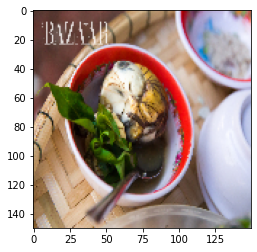

1/1 [==============================] - 0s 33ms/step
Đây là : Phở


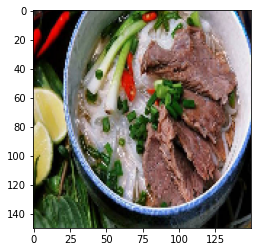

1/1 [==============================] - 0s 36ms/step
Đây là : Bánh xèo


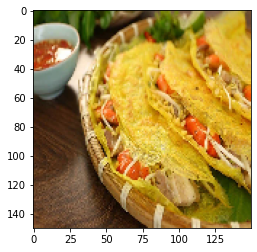

1/1 [==============================] - 0s 33ms/step
Đây là : Bún đậu


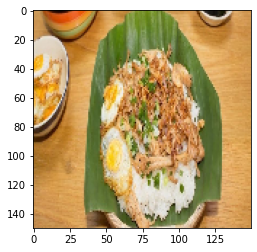

1/1 [==============================] - 0s 33ms/step
Đây là : Bún đậu


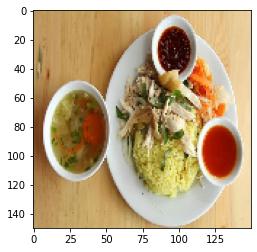

1/1 [==============================] - 0s 33ms/step
Đây là : Cơm sườn


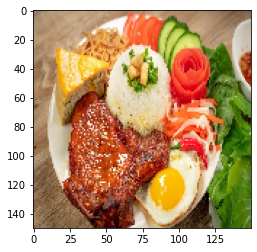

In [ ]:
test= "/content/drive/MyDrive/Colab Notebooks/BVN/FoodRec/Test/Testing1"

for i in os.listdir(test):
  img = load_img(test+'/'+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img= img/255
  img = np.expand_dims(img, axis = 0)
  result = model_CNN.predict(img)
  if round(result[0][0]) == 1:
    prediction = 'Bánh mì'
  if round(result[0][1]) == 1:
    prediction = 'Bánh xèo'
  if round(result[0][2]) == 1:
    prediction = 'Bún đậu'
  if round(result[0][3]) == 1:
    prediction = 'Cơm gà'
  if round(result[0][4]) == 1:
    prediction = 'Cơm sườn' 
  if round(result[0][5]) == 1:
    prediction = 'Mì Quảng'
  if round(result[0][6]) == 1:
    prediction = 'Phở'
  if round(result[0][7]) == 1:
    prediction = 'Thịt kho tàu'
  if round(result[0][8]) == 1:
    prediction = 'Vịt lộn'
  if round(result[0][9]) == 1:
    prediction = 'Xôi'
  print("Đây là :", prediction)
  plt.show()
